In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns
%matplotlib inline

sns.set_style("whitegrid")

In [2]:
updateddata = pd.read_csv('nonmem_master.csv')


In [3]:
updateddata.head(50)

,EMDB ID,Resolution (Angstrom),FittedPDBs,PDBvolnoGMM,Multiplier,PDBvol50,PDBvol100,PDBvol150,PDBvol200,EMvol50,EMvol100,EMvol150,PDBvol50wmult,PDBvol100wmult,PDBvol150wmult,PDBvolnoGMMwmult
0,emd_8953,4.0,6.00E+14,2.081757e+05,1,243714.25,238447.08,231005.83,225112.22,167795.89,156136.75,143727.41,243714.25,238447.08,231005.83,2.081757e+05
1,emd_8954,5.1,6.00E+15,1.845026e+05,1,214551.77,207534.42,199096.92,195402.92,154875.14,135215.16,125515.20,214551.77,207534.42,199096.92,1.845026e+05
2,emd_1180,7.7,2c7c,1.003871e+06,1,1083016.75,1067486.12,1066970.25,1072374.62,1104441.88,1124065.88,1124828.25,1083016.75,1067486.12,1066970.25,1.003871e+06
3,emd_1181,8.7,2c7d,1.000728e+06,1,1073495.12,1061662.88,1066646.00,1063102.75,1084146.75,1084448.12,1092810.12,1073495.12,1061662.88,1066646.00,1.000728e+06
4,emd_1202,8.2,2cgt,9.940143e+05,1,1055834.25,1055128.50,1057022.12,1058804.12,1030722.94,1043611.06,1044072.56,1055834.25,1055128.50,1057022.12,9.940143e+05
5,emd_1440,9.5,2vdc,1.508477e+06,1,1596798.75,1630246.00,1628186.50,1638399.12,1764643.50,1595005.62,1485775.00,1596798.75,1630246.00,1628186.50,1.508477e+06
6,emd_1676,7.5,2x31,3.799714e+05,1,416574.91,414678.78,412244.34,409141.59,185917.34,189564.56,190713.34,416574.91,414678.78,412244.34,3.799714e+05
7,emd_1884,9.8,2ykr,7.047055e+05,1,800474.81,755166.38,733395.31,728149.81,944887.75,917056.88,915860.75,800474.81,755166.38,733395.31,7.047055e+05
8,emd_2221,8.4,2ynj,9.557150e+05,1,1007966.88,1009105.50,1005430.56,1000178.06,797113.94,712746.75,644531.00,1007966.88,1009105.50,1005430.56,9.557150e+05
9,emd_1733,6.8,3c91,7.982536e+05,1,794310.94,797964.19,814081.81,805887.00,672005.81,624873.88,554954.50,794310.94,797964.19,814081.81,7.982536e+05


In [4]:
updateddata['Multiplier']

0      1
1      1
2      1
3      1
4      1
      ..
206    1
207    1
208    1
209    1
210    1
Name: Multiplier, Length: 211, dtype: int64

In [5]:
pal =sns.cubehelix_palette(4)
pal.as_hex()

['#edd1cb', '#c8879e', '#834c7d', '#2d1e3e']

(0.0, 3000000.0)

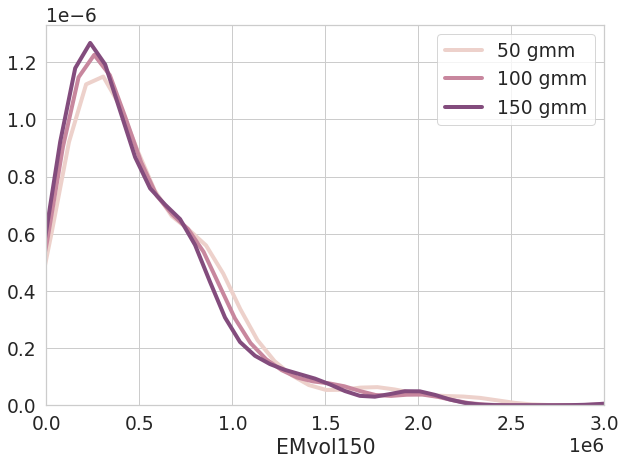

In [6]:
sns.set(style="whitegrid",rc={'figure.figsize':(10,7)},font_scale = 1.7)
#be = np.linspace(0,1,15) #for Capri
#be = np.linspace(0,1,25) #for BM5
sns.distplot(updateddata['EMvol50'], hist=False, kde=True,
             color='#edd1cb',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4},
             label = '50 gmm')
sns.distplot(updateddata['EMvol100'], hist=False, kde=True,
             color='#c8879e',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4},
             label = '100 gmm')
sns.distplot(updateddata['EMvol150'], hist=False, kde=True,
             color='#834c7d',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4},
             label = '150 gmm')
#sns.distplot(updateddata['EMvol200con'], hist=False, kde=True,
#             color='#2d1e3e',
#             hist_kws={'edgecolor':'black'},
#             kde_kws={'linewidth': 4},
#             label = '200 gmm')
plt.ticklabel_format(style='sci', scilimits=(0,0), axis='both')
plt.xlim(0, 3000000)
#plt.savefig('/home/cns-mccafferty/SortItOut/EMdist.png')

(0.0, 3000000.0)

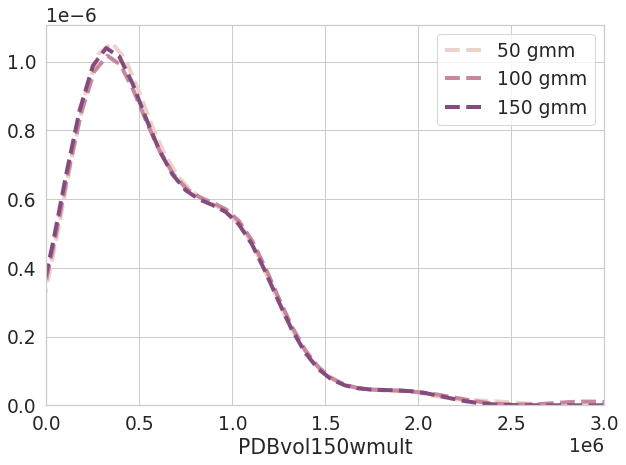

In [7]:
sns.distplot(updateddata['PDBvol50wmult'], hist=False, kde=True, 
             color='#edd1cb',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4, 'linestyle':'--'},
             label = '50 gmm')
sns.distplot(updateddata['PDBvol100wmult'], hist=False, kde=True,
             color='#c8879e',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4, 'linestyle':'--'},
             label = '100 gmm')
sns.distplot(updateddata['PDBvol150wmult'], hist=False, kde=True, 
             color='#834c7d',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4, 'linestyle':'--'},
             label = '150 gmm')
#sns.distplot(updateddata['200 adj pdb'], hist=False, kde=True, 
#             color='#2d1e3e',
#             hist_kws={'edgecolor':'black'},
#             kde_kws={'linewidth': 4, 'linestyle':'--'},
#             label = '200 gmm')
    
plt.ticklabel_format(style='sci', scilimits=(0,0), axis='both')
plt.xlim(0, 3000000)
#plt.savefig('/home/cns-mccafferty/SortItOut/PDBdist.png')

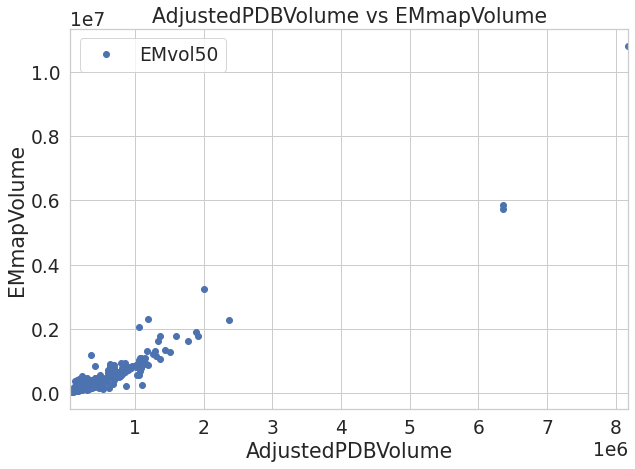

In [8]:
updateddata.plot(x='PDBvol50wmult', y='EMvol50', style='o')  
plt.title('AdjustedPDBVolume vs EMmapVolume')  
plt.xlabel('AdjustedPDBVolume')  
plt.ylabel('EMmapVolume')  
plt.show()

# For the 100 gmm

In [9]:
X = updateddata['PDBvol100wmult'].values.reshape(-1,1)
y = updateddata['EMvol100'].values.reshape(-1,1)

[-111836.11085836]
[[0.96031547]]


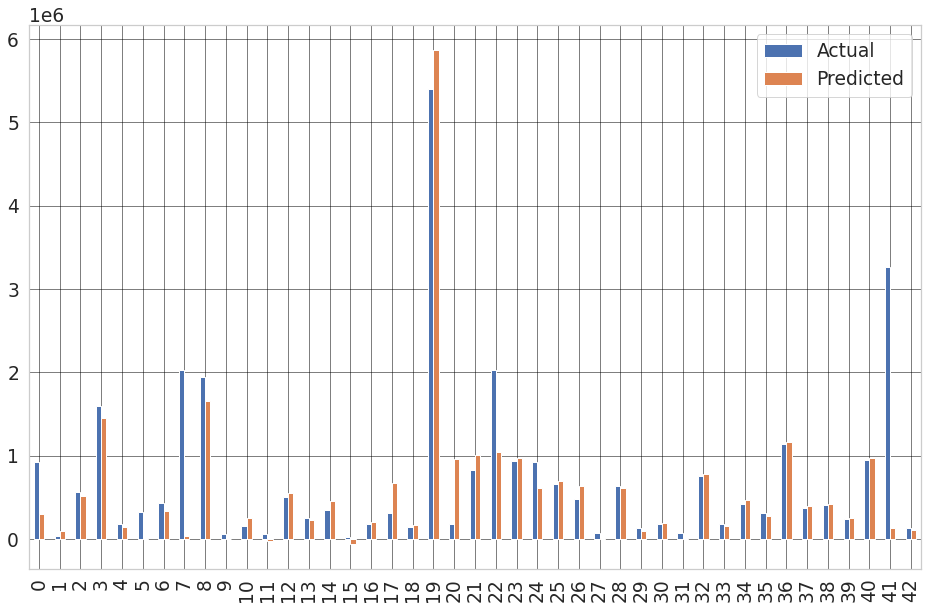

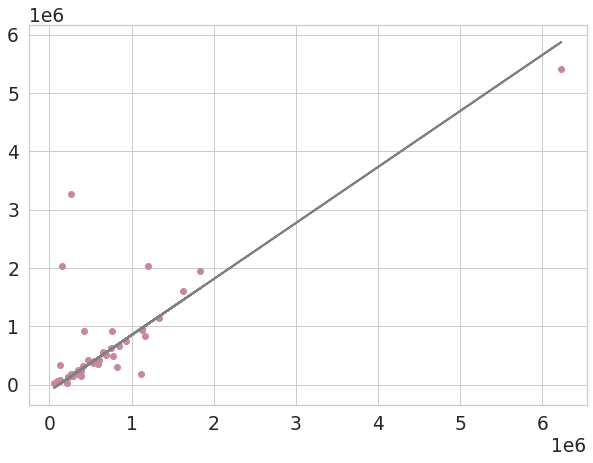

Mean Absolute Error: 257275.0699656204
Mean Squared Error: 384213440471.87115
Root Mean Squared Error: 619849.5305087124
R-squared: 0.7744997716726207


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df1 = df.head(75)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()
plt.scatter(X_test, y_test,  color='#c8879e')
plt.plot(X_test, y_pred, color='grey', linewidth=2)
plt.ticklabel_format(style='sci', scilimits=(0,0), axis='both')
plt.show()
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-squared:', regressor.score(X,y))

In [13]:
updateddata['PDBvol100wmult']

0       238447.08
1       207534.42
2      1067486.12
3      1061662.88
4      1055128.50
          ...    
206     234879.31
207     165258.44
208     170385.14
209     182587.66
210     204234.73
Name: PDBvol100wmult, Length: 211, dtype: float64

In [15]:
flatlist = list(X_test.flat)

In [16]:
updateddata[updateddata.PDBvol100wmult.isin(flatlist)].to_csv('newTestSet.csv')

# Now we look at the effect of different number of gaussians 

In [17]:
X = updateddata['PDBvol50wmult'].values.reshape(-1,1)
y = updateddata['EMvol50'].values.reshape(-1,1)

[-159785.52734952]
[[1.14708135]]


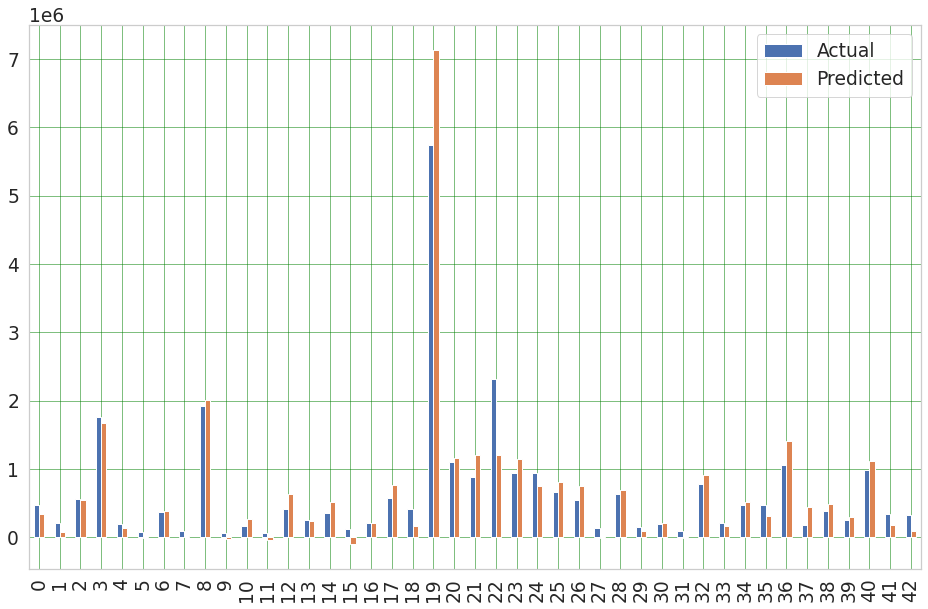

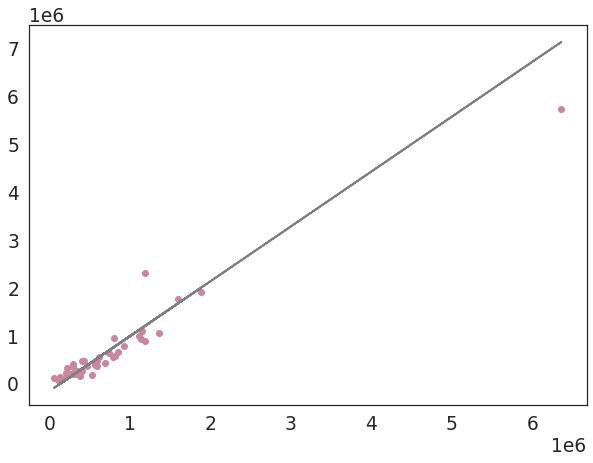

Mean Absolute Error: 179135.77735651593
Mean Squared Error: 96164154373.59013
Root Mean Squared Error: 310103.45753246633
R-squared: 0.9166827831691006


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df1 = df.head(75)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()
sns.set_style(style='white')
plt.scatter(X_test, y_test,  color='#c8879e')
plt.plot(X_test, y_pred, color='grey', linewidth=2)
plt.ticklabel_format(style='sci', scilimits=(0,0), axis='both')
plt.show()
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-squared:', regressor.score(X,y))

In [104]:
X = updateddata['PDBvol150wmult'].values.reshape(-1,1)
y = updateddata['EMvol150con'].values.reshape(-1,1)

KeyError: 'EMvol150con'

[-158782.33652344]
[[1.17397164]]


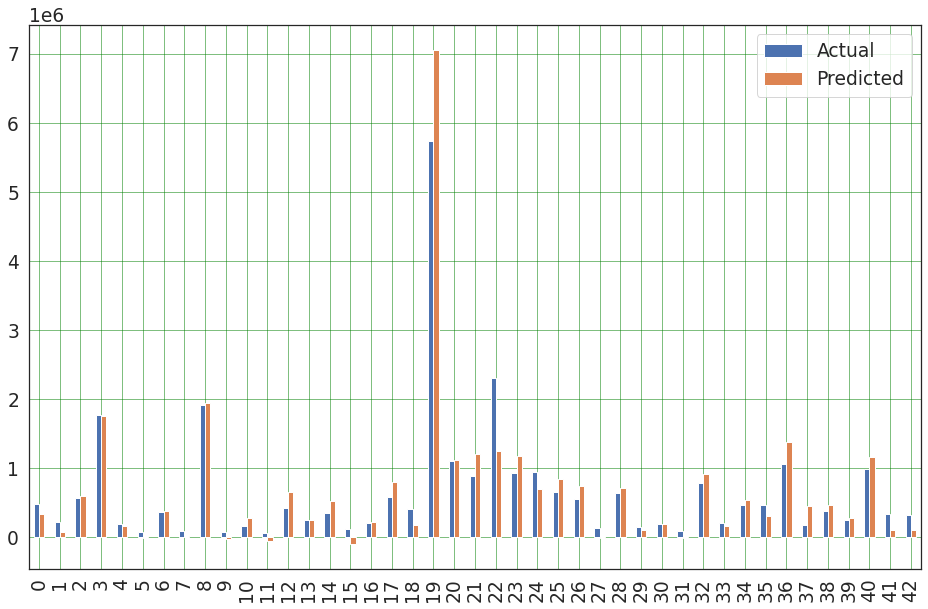

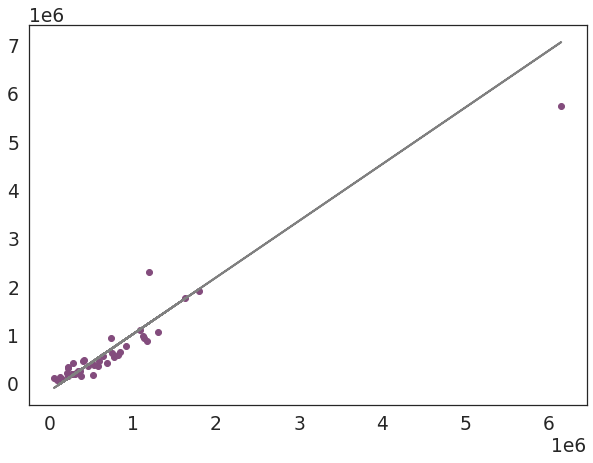

Mean Absolute Error: 179144.32680616734
Mean Squared Error: 90869874362.98422
Root Mean Squared Error: 301446.30427819845
R-squared: 0.9151762687158761


In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df1 = df.head(75)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()
plt.scatter(X_test, y_test,  color='#834c7d')
plt.plot(X_test, y_pred, color='grey', linewidth=2)
plt.ticklabel_format(style='sci', scilimits=(0,0), axis='both')
plt.show()
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-squared:', regressor.score(X,y))

In [ ]:
X = updateddata['PDB200gmm'].values.reshape(-1,1)
y = updateddata['EM200gmm'].values.reshape(-1,1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df1 = df.head(75)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()
plt.scatter(X_test, y_test,  color='#2d1e3e')
plt.plot(X_test, y_pred, color='grey', linewidth=2)
plt.ticklabel_format(style='sci', scilimits=(0,0), axis='both')
plt.show()
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-squared:', regressor.score(X,y))

# Multiple Linear Regression Using Resolution

In [106]:
X = updateddata[['PDBvol50wmult', 'Resolution (Angstrom)']].values
y = updateddata['EMvol50'].values

In [107]:
X = updateddata[['EMvol50', 'Resolution (Angstrom)']].values
y = updateddata['PDBvol50wmult'].values

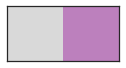

In [108]:
qualitative_colors = sns.color_palette("Set3", 10)
sns.palplot(qualitative_colors[8:])

190553.38722490007
[ 8.05500609e-01 -1.55152120e+03]


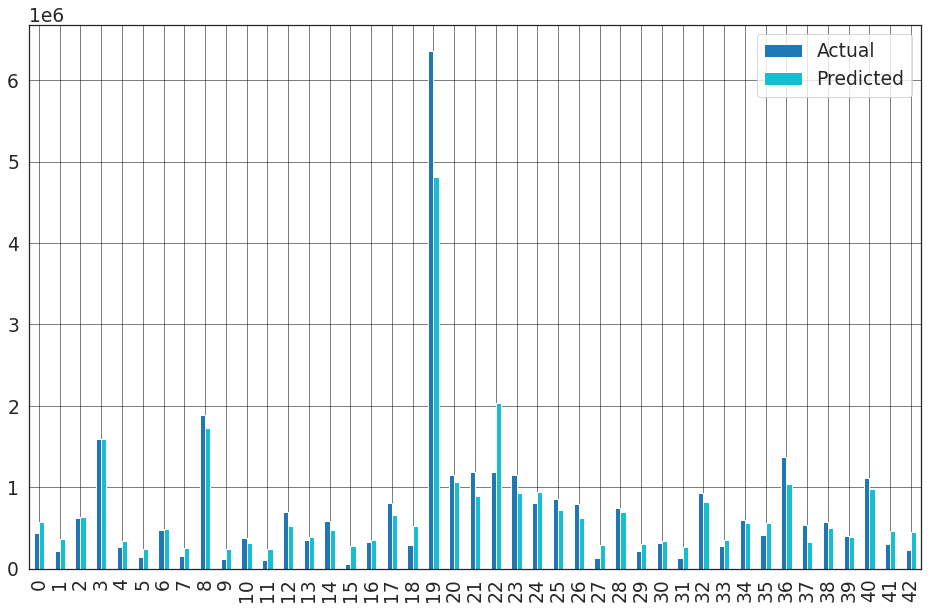

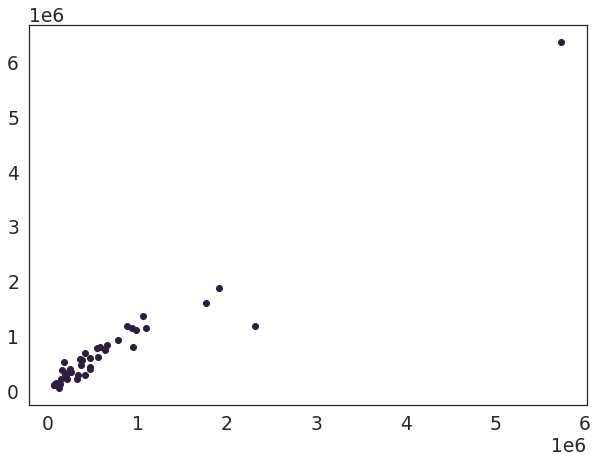

Mean Absolute Error: 172620.73480123718
Mean Squared Error: 92960746619.44365
Root Mean Squared Error: 304894.64839423413
R-squared: 0.917374686361115


In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df1 = df.head(75)
df1.plot(kind='bar', colormap='tab10', figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

pdbtestvol = [i[0] for i in X_test]
plt.scatter(pdbtestvol, y_test,  color='#2d1e3e')
#plt.plot(pdbtestvol, y_pred, color='grey', linewidth=2)
plt.ticklabel_format(style='sci', scilimits=(0,0), axis='both')
plt.show()

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-squared:', regressor.score(X,y))

In [ ]:
x = X_train[:,0]
y = X_train[:,1]
z = y_train

In [ ]:
len(y_test)

In [ ]:
len(y_pred)

In [ ]:
plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(X_test, y_test, y_pred, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('PDB Volume 50 gmm', fontsize=12)
    ax.set_ylabel('Resolution', fontsize=12)
    ax.set_zlabel('EM Volume 50 gmm', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.text2D(0.2, 0.32, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax1.transAxes, color='grey', alpha=0.5)
ax2.text2D(0.3, 0.42, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax2.transAxes, color='grey', alpha=0.5)
ax3.text2D(0.85, 0.85, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax3.transAxes, color='grey', alpha=0.5)

ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

#fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()

In [ ]:
file = 'https://aegis4048.github.io/downloads/notebooks/sample_data/unconv_MV_v5.csv'
df = pd.read_csv(file)

In [ ]:
X = df[['Por', 'Brittle']].values.reshape(-1,2)
Y = df['Prod']

In [ ]:
x = X[:, 0]
y = X[:, 1]
z = Y

In [ ]:
x_pred = np.linspace(6, 24, 30)   # range of porosity values
y_pred = np.linspace(0, 100, 30)  # range of brittleness values
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

In [ ]:
from sklearn import linear_model

ols = linear_model.LinearRegression()
model = ols.fit(X, Y)
predicted = model.predict(model_viz)

In [ ]:
y_test.flatten()

In [ ]:
y

In [ ]:
test_set =[]
for i in y_test:
     test_set.append(updateddata[updateddata['EMvol50']==i]['FittedPDBs'])

In [ ]:
print(test_set)

# PDBs not converted to gmm

In [120]:
X = updateddata['PDBvolnoGMMwmult'].values.reshape(-1,1)
y = updateddata['EMvol100'].values.reshape(-1,1)

[154800.89722844]
[[0.57503778]]


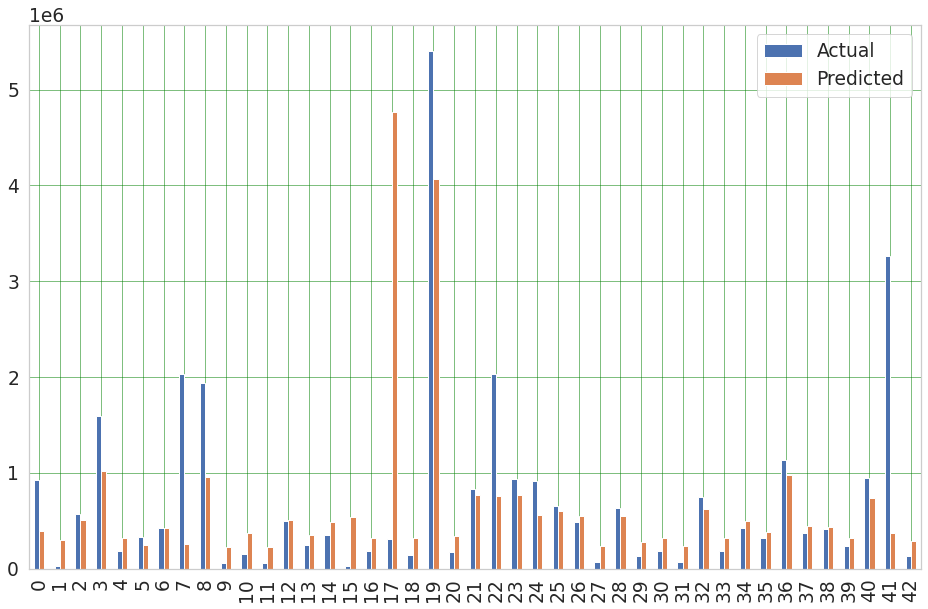

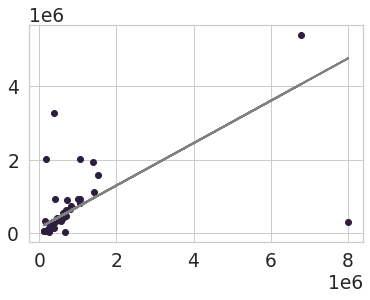

Mean Absolute Error: 434505.0553150266
Mean Squared Error: 870093595412.2965
Root Mean Squared Error: 932788.0763669186
R-squared: 0.39848020360937486


In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df1 = df.head(75)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()
plt.scatter(X_test, y_test,  color='#2d1e3e')
plt.plot(X_test, y_pred, color='grey', linewidth=2)
plt.ticklabel_format(style='sci', scilimits=(0,0), axis='both')
plt.show()
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-squared:', regressor.score(X,y))

In [ ]:
a = [426, 453, 418, 546, 537, 393, 542, 411, 526, 433, 556, 548, 521, 421, 430, 298, 432, 219, 519, 516, 540, 554, 540, 450, 158, 553]
b = [186, 183, 448, 204, 249, 11, 249, 171, 191, 183, 187, 198, 325, 76, 183, 241, 325, 46, 244, 174, 325, 198, 50, 446, 190, 308, 72, 207, 50, 353, 199, 447, 248, 214, 130, 131, 309, 250, 46, 215, 49, 202, 139, 119, 320, 204, 8, 171, 208, 354, 325, 196, 308, 238, 208, 215, 207, 325, 242, 448, 191, 352, 170, 49, 202, 455, 214, 122, 356, 72, 205, 76, 472, 312, 50, 554, 250, 139, 250, 170, 319, 174, 314, 122, 309, 446, 215, 187, 447, 4, 208, 349, 355, 135, 190, 314, 135, 72, 130, 237, 175, 179, 167, 204, 213, 553, 315, 352, 206, 312, 201, 253, 93, 8, 537, 221, 134, 310, 244, 246, 350, 72, 135, 306, 443, 142, 236, 214, 472, 357, 71, 355, 187, 213, 48, 127, 306, 198, 242, 314, 445, 309, 373, 66, 311, 521, 214, 215, 139, 136, 314, 131, 249, 454, 251, 316, 310, 509, 312, 174, 52, 421, 134, 188, 204, 53, 425, 53, 356, 208, 208, 206, 520, 398, 10, 309, 237, 190, 205, 70]
c = [609]


In [ ]:
len(a) + len(b) + len(c)